Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2319 - accuracy: 0.9316 - val_loss: 0.1143 - val_accuracy: 0.9667
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0982 - accuracy: 0.9701 - val_loss: 0.0806 - val_accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.0910 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0878 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0902 - val_accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9903 - val_loss: 0.0823 - val_accuracy:

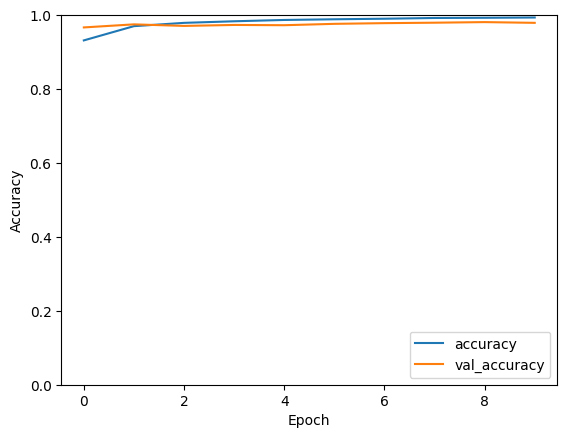

313/313 - 0s - loss: 0.0846 - accuracy: 0.9791 - 468ms/epoch - 1ms/step

Test accuracy: 0.9790999889373779


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)